
# <p style="text-align: center;">MIS382: Advanced Predictive Modeling</p>
# <p style="text-align: center;">Assignment 2</p>
## <p style="text-align: center;">Total points: 40</p>
## <p style="text-align: center;">Due: Wed, October 4th, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group.  

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Question 1 - Bias-variance Trandeoff (2pts)
How does the choice of K in the K-nearest neighbor classifier reflect a bias-variance tradeoff?

## Answer

- When k gets larger, fitted model gets simpler (i.e. when k=n the fitted line is simply the sample average). Fitted lines will not vary much with different sets of samples, hence low variance. However, since the model is simple, the avreage fitted line will likely to be very different from true line, hence high bias.

- When k gets smaller, fitted model gets more complex. Fitted lines will vary a lot with different sets of samples, hence high variance. However, since the model is more complex and fits data better, the avreage fitted line will likely to be close to true line, hence low bias.

# Question 2: Data Exploration and Regression Analysis (4+3+4+4=15pts)

Consider the dataset provided (russett_full_v2.csv) about agricultural inequality, industrial development and political instability in different countries. More information about it can be found [here](https://www.rdocumentation.org/packages/plspm/versions/0.4.9/topics/russett) though the data itself is slightly different than that referenced in the link.

a) (4 points) Generate box-plots of the "rent" (% of farmers that rent all their land), "inst" (measure of political stability in the executive branch), "ecks" (number of violent internal war incidents ) and "demo_score" ( derived measure of the level of a country's democracy from 1945 to 61 ) and identify the cutoff values for outliers. 

Generate 3 scatterplots of "rent" against "demo_score", "inst" against "demo_score" and "ecks" against "demo_score" with the identified outliers colored differently than non-outliers in each; comment on how inclusion of the outliers would affect a predictive model for the "demo_score" response.  

b) (3 points) Let us try to fit an MLR, using ordinary least squares, to this dataset with "demo_score" as the dependent variable using only the predictors 'rent','inst', and 'ecks' . 

    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state=22)   

Report the RMSE obtained on both X_train and X_test. How much does this increase when you score your model on X_test?

c) (4 points ) Try to predict ”demo_score” using a robust regression using Huber loss.  You can use the [sklearn package](  http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.HuberRegressor.html).  Set regularization parameter alpha to 0.0 and all other parameters as default.
Report RMSE obtained on both X_train and X_test.

d) (4 points ) Compare and comment on the model fits obtained in (b) and (c) and plot the residual plots using all data for each model. How do outliers affect the relative performance of ordinary least squares regression, and robust regression with Huber loss in general? 

## Answer

In [1]:
import pandas as pd
russett = pd.read_csv('russett_full_v2.csv')

### a)

Populating the interactive namespace from numpy and matplotlib


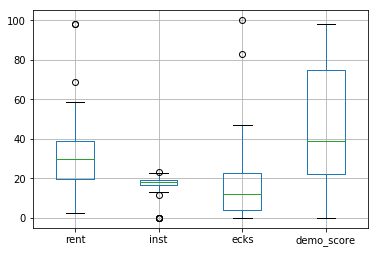

In [2]:
from matplotlib import pyplot as plt
%pylab inline

columns = ['rent','inst','ecks','demo_score']
russett.boxplot(column = columns)

In [3]:
from scipy.stats import iqr

cutoff = {}
for c in columns:
    r = iqr(russett[c])
    upper = russett[c].quantile(0.75) + 1.5*r
    lower = russett[c].quantile(0.25) - 1.5*r
    cutoff[c] = (lower,upper)
    print '{}: outlier cutoff is ({},{})'.format(c, lower, upper)


rent: outlier cutoff is (-9.075,67.525)
inst: outlier cutoff is (12.425,23.425)
ecks: outlier cutoff is (-24.5,51.5)
demo_score: outlier cutoff is (-56.25,153.75)


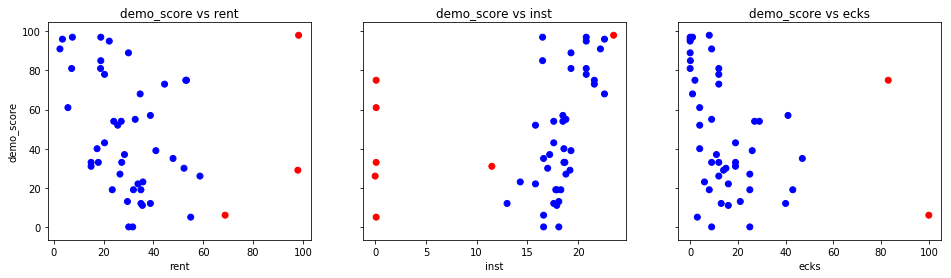

In [4]:
color = {}
for c in columns:
    color[c] = ['r' if x < cutoff[c][0] or x > cutoff[c][1] else 'b' for x in russett[c]]

fig, (ax1, ax2, ax3) = subplots(nrows=1,
                                ncols=3,
                                sharey=True,
                                figsize=(16,4))
ax1.scatter(russett.rent, russett.demo_score, color = color['rent'])
ax1.set_title('demo_score vs rent')
ax1.set_xlabel('rent')
ax1.set_ylabel('demo_score')

ax2.scatter(russett.inst, russett.demo_score, color = color['inst'])
ax2.set_title('demo_score vs inst')
ax2.set_xlabel('inst')

ax3.scatter(russett.ecks, russett.demo_score, color = color['ecks'])
ax3.set_title('demo_score vs ecks')
ax3.set_xlabel('ecks')

If we include outlier in sample, prediction accuracy might be strongly affected. For example, for a OLS regession model, in order the minize the residual from outliers, fitted line might not capture the main pattern of the sample, hence reducing prediction accuracy.

### b)

In [5]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import train_test_split

X = russett[['rent', 'inst', 'ecks']]
y = russett['demo_score']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state=22)

reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)
y_train_fit = reg.predict(X_train)
y_pred = reg.predict(X_test)


print 'in-sample RMSE:', sqrt(mean_squared_error(y_train,y_train_fit))
print 'out-of-sample RMSE:', sqrt(mean_squared_error(y_test,y_pred))
print 'increase in RMSE (from train to test):', sqrt(mean_squared_error(y_test,y_pred)) - sqrt(mean_squared_error(y_train,y_train_fit))

in-sample RMSE: 25.781460397
out-of-sample RMSE: 32.580671803
increase in RMSE (from train to test): 6.79921140601


/usr/local/lib/python2.7/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


### c)

In [6]:
huber = linear_model.HuberRegressor(alpha = 0)

huber.fit(X_train,y_train)
y_train_fit = huber.predict(X_train)
y_pred = huber.predict(X_test)

print 'in-sample RMSE:', sqrt(mean_squared_error(y_train,y_train_fit))
print 'out-of-sample RMSE:', sqrt(mean_squared_error(y_test,y_pred))


in-sample RMSE: 26.8358817541
out-of-sample RMSE: 29.1663802872


### d)

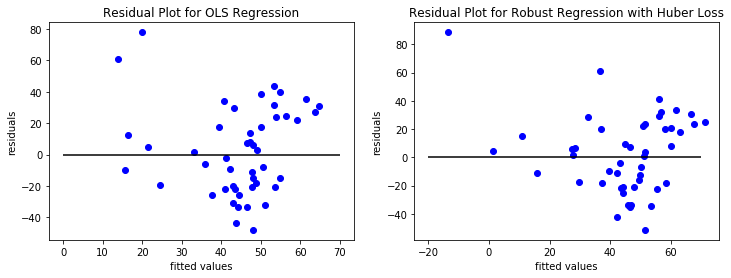

In [7]:
y_fit_reg = reg.predict(X)
y_fit_huber = huber.predict(X)

fig, (ax1, ax2) = subplots(nrows=1,
                                ncols=2,
                                figsize=(12,4))
ax1.scatter(y_fit_reg, y - y_fit_reg, c = 'b')
ax1.hlines(y=0,xmin=0,xmax=70)
ax1.set_xlabel('fitted values')
ax1.set_ylabel('residuals')
ax1.set_title('Residual Plot for OLS Regression')

ax2.scatter(y_fit_huber, y - y_fit_huber, c = 'b')
ax2.hlines(y=0,xmin=-20,xmax=70)
ax2.set_xlabel('fitted values')
ax2.set_ylabel('residuals')
ax2.set_title('Residual Plot for Robust Regression with Huber Loss')



Outliers affect OLS regression much stronger than robust regression with Huber loss. As shown in the residual plot for OLS regression, the smallest fitted value is greater than 10 and the residual is lower than 80. However, smallest fitted value for robust regression with Huber loss is around -12 and has the residual is higher than 80. Robust regression model reduce the effect of outliers on fitted line by reducing weight on residual resulting from outliers.

# Question 3 - Sampling (4+4=8pts)

1. NBC has come up with an extreme TV show, and each of its viewers either likes or hates it. (no middle ground here; we are in a “black and white age”). NBC wants to estimate what fraction p of its audience like the show by “randomly” calling n viewers and tallying their responses so as to estimate the true value of p to a fractional accuracy of within ±ε%, with a confidence of (1 − α) × 100%. For α = 0.10, ε = 0.03 (i.e. your answer will be $\hat{p}$ ± 0.03), what is the minimum value of n needed if true value (i) p = 0.5, (ii) p=0.25? 

2. Suppose for a certain value of p and choice of ε, you calculate that you will need 1000 samples for α = 0.02. You now decide to obtain a more accurate answer by either (i) reducing α to 0.01, keeping the same ε or by (ii) reducing ε by a factor of 2 from the original value, and increasing α to 0.05. In each case how many samples would you need now?

## Answer

### 1.

Since $\alpha = 0.10$, $Z_{\alpha/2} = 1.65$

i) When $p = 0.5$,
\begin{align}
n &= p(1-p)(\frac{Z_{\alpha/2}}{\epsilon})^2 \\
&= 0.5(1-0.5)(\frac{1.65}{0.03})^2 \\
&= 756.25 \\
&\approx \textbf{757}
\end{align}

ii) When $p = 0.25$,
\begin{align}
n &= p(1-p)(\frac{Z_{\alpha/2}}{\epsilon})^2 \\
&= 0.25(1-0.25)(\frac{1.65}{0.03})^2 \\
&= 567.1875 \\
&\approx \textbf{568}
\end{align}

### 2.

When $\alpha = 0.02$, $Z_{\alpha/2} = 2.33$.

Since,
\begin{align}
n &= p(1-p)(\frac{Z_{\alpha/2}}{\epsilon})^2\\
&= p(1-p)(\frac{2.33}{\epsilon})^2 \\
&= 1000 \\
\end{align}

Then,
\begin{align}
\frac{p(1-p)}{\epsilon^2} &= \frac{1000}{2.33^2} \\
&= 184.2\\
\end{align}

i) $\alpha_{new} = 0.01$, $Z_{\alpha_{new}/2} = 2.58$. Then,
\begin{align}
n_{new} &= p(1-p)(\frac{Z_{\alpha_{new}/2}}{\epsilon})^2\\
&= 2.58^2 \times 184.2\\
&= 1226.10\\
&\approx \textbf{1227}
\end{align}

ii) $\alpha_{new} = 0.05$, $Z_{\alpha_{new}/2} = 1.96$. $\epsilon_{new} = \frac{\epsilon}{2}$. Then,
\begin{align}
n_{new} &= p(1-p)(\frac{Z_{\alpha_{new}/2}}{\epsilon_{new}})^2\\
&= 2^2 \times 1.96^2 \times 184.2\\
&= 2830.49\\
&\approx \textbf{2831}
\end{align}


# Question 4 - Principal Component Analysis (10 points)

Import the diabetes dataset as in Q1 and add the interaction variables.
You should have 65 variables and one target variable.

In [8]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

from sklearn.preprocessing import PolynomialFeatures
X = PolynomialFeatures(2, include_bias=False).fit_transform(X)

Next, use [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) to center and scale each feature as follows.

In [9]:
from sklearn.preprocessing import StandardScaler
stdScaler = StandardScaler()
X = stdScaler.fit_transform(X)

(a) Perform PCA using the sklearn [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) package.  Create i) a scree plot depicting the proportion of variance and ii) a cumulative proportion of variance explained by the principal components of the data (X matrix).  Refer to Figure 10.4 of JW for an example.  You may use the output attribute *explained variance ratio*. (3pts)

(b) How many principal components (N1, N2, N3) are required to explain cumulative variance of 30%, 60%, and 90%, respectively? (3pts)

(c) Fit an ordinary least squares linear regression using N1, N2, and N3 number of principal components, respectively. (This is called Principal Components Regression) Use entire dataset, e.g. 442 rows. Evaluate the models using mean squared error (MSE). (4pts)

## Answer

### a)

In [10]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

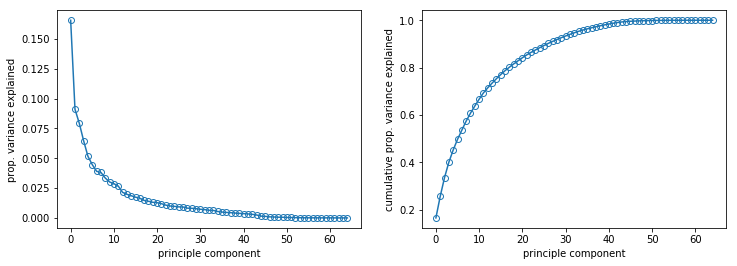

In [11]:
fig, (ax1, ax2) = subplots(nrows=1,ncols=2,figsize=(12,4))

ax1.plot(pca.explained_variance_ratio_, marker = 'o', markerfacecolor='none') 
ax1.set_xlabel('principle component')
ax1.set_ylabel('prop. variance explained')

ax2.plot(np.cumsum(pca.explained_variance_ratio_), marker = 'o', markerfacecolor='none')
ax2.set_xlabel('principle component')
ax2.set_ylabel('cumulative prop. variance explained')

### b)

In [12]:
cum_exp = np.cumsum(pca.explained_variance_ratio_)

N1 = np.where(cum_exp >= 0.3)[0][0]+1
N2 = np.where(cum_exp >= 0.6)[0][0]+1
N3 = np.where(cum_exp >= 0.9)[0][0]+1

print '{} principal components are required to explain cumulative variance of 30%'.format(N1)
print '{} principal components are required to explain cumulative variance of 60%'.format(N2)
print '{} principal components are required to explain cumulative variance of 90%'.format(N3)

3 principal components are required to explain cumulative variance of 30%
9 principal components are required to explain cumulative variance of 60%
27 principal components are required to explain cumulative variance of 90%


### c)

In [13]:
pca_30 = PCA(n_components = N1)
pca_60 = PCA(n_components = N2)
pca_90 = PCA(n_components = N3)

pca_30.fit(X)
pca_60.fit(X)
pca_90.fit(X)

X_pca_30 = pca_30.fit_transform(X)
X_pca_60 = pca_60.fit_transform(X)
X_pca_90 = pca_90.fit_transform(X)

reg = linear_model.LinearRegression()
reg.fit(X_pca_30,y)
y_fit_30 = reg.predict(X_pca_30)

reg.fit(X_pca_60,y)
y_fit_60 = reg.predict(X_pca_60)

reg.fit(X_pca_90,y)
y_fit_90 = reg.predict(X_pca_90)

print 'MSE using {} principal component:'.format(N1), mean_squared_error(y,y_fit_30)
print 'MSE using {} principal component:'.format(N2), mean_squared_error(y,y_fit_60)
print 'MSE using {} principal component:'.format(N3), mean_squared_error(y,y_fit_90)

MSE using 3 principal component: 5120.60554779
MSE using 9 principal component: 3942.78675143
MSE using 27 principal component: 2857.425949


# Question 5 -  Feature Selection ( 5 points )

Explain what you understand by the two wrapper methods for feature selection (forward and backward selection) (no more than 1 paragraph). 


In linear regression models, including too many predictors might cause overfitting problems. By reducing number of predictors and selecting important features, model would have higher prediction accuracy and better interprebility. Forward and backward selection are two wrapper methods that select the subset of features which result in best fitted models. Forward selection starts from null model and adds one predictor that provides the most improvement in fit at a time until no more improvement can be made; Backward selection starts from full model and remove the least useful predictor at a time until no more predictor can be removed for model improvement.